<a href="https://colab.research.google.com/github/HieuTranV/DataVisualization/blob/dev/LabCK/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import scipy.stats
warnings.filterwarnings('ignore') 

In [2]:
!pip install --upgrade scikit-learn
!pip install category_encoders

Requirement already up-to-date: scikit-learn in g:\anaconda\lib\site-packages (0.24.2)


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('data_update.csv')

In [6]:
data

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc
0,4.75 Tỷ - 52.78 Triệu/m²,"Quận Sơn Trà, Thành phố Đà Nẵng",90 m²,Mặt phố - Mặt đường,5m,Đông Bắc,Nhà môi giới,Nhà ở,---,---,2,---
1,Thương lượng,"Thị xã Phổ Yên, Tỉnh Thái Nguyên",120 m²,Mặt phố - Mặt đường,8.5m,---,Sàn bất động sản,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
2,2.2 Tỷ - 56.41 Triệu/m²,"Huyện Hoài Đức, Thành phố Hà Nội",39 m²,Ngõ 1 ô tô,3.5m,Tây,Chính chủ,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
3,770 Triệu - 14 Triệu/m²,"Quận Thanh Xuân, Thành phố Hà Nội",55 m²,Ngõ 1 ô tô,---,---,Chính chủ,"Chung cư, Chung cư mini",---,---,---,"Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán"
4,890 Triệu - 8.9 Triệu/m²,"Huyện Bàu Bàng, Tỉnh Bình Dương",100 m²,Ngõ 4 ô tô trở lên,5m,Tây,Nhà môi giới,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
...,...,...,...,...,...,...,...,...,...,...,...,...
11936,2.25 Tỷ - 52.33 Triệu/m²,"Quận Ninh Kiều, Thành phố Cần Thơ",43 m²,Ngõ 1 ô tô,6m,Tây Nam,Nhà môi giới,Nhà ở,---,2,2,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11937,1.1 Tỷ - 33.33 Triệu/m²,"Quận Hà Đông, Thành phố Hà Nội",33 m²,Ngõ 2 ô tô tránh,---,---,Chính chủ,Nhà ở,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11938,1 Tỷ - 10 Triệu/m²,"Huyện Lục Yên, Tỉnh Yên Bái",100 m²,Mặt phố - Mặt đường,---,---,Nhà môi giới,Đất - Đất nền - Nhà như đất,---,---,---,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11939,25 Tỷ - 50 Triệu/m²,"Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",500 m²,Mặt phố - Mặt đường,---,Đông Nam,Nhà môi giới,Đất - Đất nền - Nhà như đất,---,---,---,---


In [7]:
data.iloc[5294]

Price                     3,750,000,000 Tỷ - 93,750,000 Tỷ/m²
Location                   Quận Nam Từ Liêm, Thành phố Hà Nội
Area                                                    40 m²
Street                                       Ngõ 2 ô tô tránh
Facade                                                    ---
Direction                                                 ---
Saler                                            Nhà môi giới
Type                                                    Nhà ở
Floor                                                     ---
Bathrooms                                                   6
Bedrooms                                                    6
Legal Doc    Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán
Name: 5294, dtype: object

In [8]:
# data = data.drop([5294,7581])

In [9]:
data.iloc[6837]

Price               17.5 Tỷ - 35 Nghìn/m²
Location     Huyện Tân Lạc, Tỉnh Hoà Bình
Area                           500,000 m²
Street                                ---
Facade                                ---
Direction                             ---
Saler                        Nhà môi giới
Type          Đất - Đất nền - Nhà như đất
Floor                                 ---
Bathrooms                             ---
Bedrooms                              ---
Legal Doc                             ---
Name: 6837, dtype: object

In [10]:
for name in data.columns:
    data[name].replace('---', np.NaN, inplace=True)

In [11]:
num_row_dup = data.duplicated().sum()
num_row_dup

1185

In [12]:
new_data = data.drop_duplicates()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10756 entries, 0 to 11940
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      10756 non-null  object
 1   Location   10756 non-null  object
 2   Area       10649 non-null  object
 3   Street     9625 non-null   object
 4   Facade     5688 non-null   object
 5   Direction  1948 non-null   object
 6   Saler      10756 non-null  object
 7   Type       10754 non-null  object
 8   Floor      474 non-null    object
 9   Bathrooms  2064 non-null   object
 10  Bedrooms   4748 non-null   object
 11  Legal Doc  9099 non-null   object
dtypes: object(12)
memory usage: 1.1+ MB


In [13]:
new_data = new_data[new_data.Price != 'Thương lượng']
new_data

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc
0,4.75 Tỷ - 52.78 Triệu/m²,"Quận Sơn Trà, Thành phố Đà Nẵng",90 m²,Mặt phố - Mặt đường,5m,Đông Bắc,Nhà môi giới,Nhà ở,NaN,NaN,2,NaN
2,2.2 Tỷ - 56.41 Triệu/m²,"Huyện Hoài Đức, Thành phố Hà Nội",39 m²,Ngõ 1 ô tô,3.5m,Tây,Chính chủ,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
3,770 Triệu - 14 Triệu/m²,"Quận Thanh Xuân, Thành phố Hà Nội",55 m²,Ngõ 1 ô tô,NaN,NaN,Chính chủ,"Chung cư, Chung cư mini",NaN,NaN,NaN,"Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán"
4,890 Triệu - 8.9 Triệu/m²,"Huyện Bàu Bàng, Tỉnh Bình Dương",100 m²,Ngõ 4 ô tô trở lên,5m,Tây,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
5,800 Triệu - 19.51 Triệu/m²,"Huyện Gia Lâm, Thành phố Hà Nội",41 m²,Ngõ ngách,3.6m,NaN,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
...,...,...,...,...,...,...,...,...,...,...,...,...
11936,2.25 Tỷ - 52.33 Triệu/m²,"Quận Ninh Kiều, Thành phố Cần Thơ",43 m²,Ngõ 1 ô tô,6m,Tây Nam,Nhà môi giới,Nhà ở,NaN,2,2,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11937,1.1 Tỷ - 33.33 Triệu/m²,"Quận Hà Đông, Thành phố Hà Nội",33 m²,Ngõ 2 ô tô tránh,NaN,NaN,Chính chủ,Nhà ở,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11938,1 Tỷ - 10 Triệu/m²,"Huyện Lục Yên, Tỉnh Yên Bái",100 m²,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng
11939,25 Tỷ - 50 Triệu/m²,"Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",500 m²,Mặt phố - Mặt đường,NaN,Đông Nam,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,NaN


In [14]:
new_data[new_data['Price'] == '2,260,000 Tỷ - 29,736.84 Tỷ/m²']

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc
7581,"2,260,000 Tỷ - 29,736.84 Tỷ/m²","Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",76 m²,NaN,NaN,NaN,Nhà môi giới,Chung cư,NaN,NaN,NaN,NaN


In [15]:
regexp = re.compile(r'(\d+[.,]?\d*[,.]?\d*)\s(\w+)\s?-?\s?(\d+[.,]?\d*[,.]?\d*)?\s?(\w+\W\w+)?')
row = '1,500,000 Tỷ - 10,714.29 Tỷ/m²'
matches = regexp.findall(row)
matches

[('1,500,000', 'Tỷ', '10,714.29', 'Tỷ/m²')]

In [16]:
def convert_Price_col(prices):
    list_price = []
    list_price_per_squarem = []
    weird_index = []
    
    for index, price in enumerate(prices):
        pr = float(regexp.sub(r'\1', price).replace(",",""))
        if regexp.sub(r'\2', price) == 'Triệu':
            pr /= 1e3
        pp = regexp.sub(r'\3', price).replace(",","")
        p_unit = regexp.sub(r'\4', price)
        if pp == '':
            pp = np.NaN
        if p_unit != 'Triệu/m²':
            weird_index.append(index)
            if p_unit == 'Tỷ/m²':
                pp = float(pp)*1e3
            elif p_unit == 'Nghìn/m²':
                pp = float(pp)/1e6
        list_price.append(pr)
        list_price_per_squarem.append(float(pp)) 
    return list_price, list_price_per_squarem, weird_index

list_price, list_price_per_squarem, weird_index = convert_Price_col(list(new_data['Price']))

In [17]:
len(weird_index)

344

In [18]:
# for idx in weird_index:
#     print(new_data.iloc[idx]['Price'])

In [19]:
new_data['Price(million/m_square)'] = list_price_per_squarem
new_data['Price'] = list_price

In [20]:
def convert_Area_col(row):
    return float(row[:row.find('m²')].strip().replace(",",""))

new_data['Area'] = new_data['Area'].apply(lambda x : convert_Area_col(x) if x == x else x) 
new_data['Facade'] = new_data['Facade'].apply(lambda x : convert_Area_col(x) if x == x else x) 

- Price: đơn vị tỷ

In [21]:
new_data.tail(5)

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc,Price(million/m_square)
11936,2.25,"Quận Ninh Kiều, Thành phố Cần Thơ",43.0,Ngõ 1 ô tô,6.0,Tây Nam,Nhà môi giới,Nhà ở,NaN,2,2,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,52.33
11937,1.10,"Quận Hà Đông, Thành phố Hà Nội",33.0,Ngõ 2 ô tô tránh,NaN,NaN,Chính chủ,Nhà ở,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,33.33
11938,1.00,"Huyện Lục Yên, Tỉnh Yên Bái",100.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,10.00
11939,25.00,"Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",500.0,Mặt phố - Mặt đường,NaN,Đông Nam,Nhà môi giới,Đất - Đất nền - Nhà như đất,NaN,NaN,NaN,NaN,50.00
11940,8.50,"Quận Hà Đông, Thành phố Hà Nội",46.0,Ngõ 2 ô tô tránh,4.0,NaN,Nhà môi giới,Nhà ở,NaN,3,4,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,184.78


In [22]:
new_data['Floor'] = new_data['Floor'].astype(float)
new_data['Bedrooms'] = new_data['Bedrooms'].astype(float)
new_data['Bathrooms'] = new_data['Bathrooms'].astype(float)

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 0 to 11940
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10042 non-null  float64
 1   Location                 10042 non-null  object 
 2   Area                     10009 non-null  float64
 3   Street                   9027 non-null   object 
 4   Facade                   5417 non-null   float64
 5   Direction                1845 non-null   object 
 6   Saler                    10042 non-null  object 
 7   Type                     10042 non-null  object 
 8   Floor                    465 non-null    float64
 9   Bathrooms                1997 non-null   float64
 10  Bedrooms                 4580 non-null   float64
 11  Legal Doc                8542 non-null   object 
 12  Price(million/m_square)  10009 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


In [24]:
cat_col_df = new_data.select_dtypes(include='object')

def missing_ratio(col):
    return col.isna().mean()*100

def top10_value_counts(col):
    return dict(col.value_counts()[:10])

category_stat = cat_col_df.agg([missing_ratio, pd.Series.nunique, top10_value_counts])
pd.set_option('display.max_colwidth', 1000)
category_stat

,Location,Street,Direction,Saler,Type,Legal Doc
missing_ratio,0,10.1075,81.6272,0,0,14.9373
nunique,300,8,37,8,194,15
top10_value_counts,"{'Quận Hà Đông, Thành phố Hà Nội': 630, 'Quận Đống Đa, Thành phố Hà Nội': 562, 'Quận Thanh Xuân, Thành phố Hà Nội': 513, 'Quận Cầu Giấy, Thành phố Hà Nội': 434, 'Quận Hoàng Mai, Thành phố Hà Nội': 361, 'Quận Bắc Từ Liêm, Thành phố Hà Nội': 354, 'Quận Hai Bà Trưng, Thành phố Hà Nội': 304, 'Quận Long Biên, Thành phố Hà Nội': 292, 'Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu': 272, 'Quận Tây Hồ, Thành phố Hà Nội': 267}","{'Mặt phố - Mặt đường': 3329, 'Ngõ ô tô đỗ cửa': 1497, 'Ngõ 2 ô tô tránh': 1455, 'Ngõ ngách': 1445, 'Ngõ 1 ô tô': 1062, 'Ngõ 3 ô tô tránh': 174, 'Ngõ 4 ô tô trở lên': 45, 'Ngõ 4 ô tô tránh': 20}","{'Đông Nam': 365, 'Đông Bắc': 234, 'Tây Nam': 224, 'Tây Bắc': 221, 'Nam': 179, 'Đông': 136, 'Bắc': 117, 'Đông Tứ Trạch': 108, 'Tây Tứ Trạch': 81, 'Tây': 75}","{'Nhà môi giới': 7754, 'Chính chủ': 1839, 'Khách vãng lai': 181, 'Sàn bất động sản': 105, 'Chủ đầu tư': 98, 'Quảng cáo': 37, 'Nhà đầu tư': 27, 'Ngân Hàng': 1}","{'Nhà ở': 4720, 'Đất - Đất nền - Nhà như đất': 2684, 'Chung cư': 815, 'Biệt thự - Song lập - Đơn lập': 276, 'Nhà liền kề - Song lập - Đơn lập': 181, 'Shophouse - Nhà phố': 125, 'Nhà cấp 4': 120, 'Chung cư mini': 102, 'Nhà ở, Nhà liền kề - Song lập - Đơn lập': 51, 'Nhà ở, Đất - Đất nền - Nhà như đất': 48}","{'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng': 8050, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán': 315, 'Hợp đồng mua bán': 145, 'Đang làm giấy CN QSDĐ': 6, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Giấy tờ chứng minh nguồn gốc': 5, 'Đã có giấy hẹn lấy số': 5, 'Hợp đồng góp vốn': 4, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Hợp đồng góp vốn': 3, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Giấy tờ chứng minh nguồn gốc': 2, 'Đất giao - Đất phân': 2}"


In [25]:
numeric_cols_df = new_data.select_dtypes(exclude='object')

def median(col):
    return col.quantile(0.5)

def lower_quantile(col):
    return col.quantile(0.25)

def upper_quantile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, median, lower_quantile, upper_quantile,max])

,Price,Area,Facade,Floor,Bathrooms,Bedrooms,Price(million/m_square)
missing_ratio,0.000000e+00,0.32862,46.056562,95.369448,80.113523,54.391555,3.286198e-01
min,1.000000e-03,1.20000,1.000000,1.000000,1.000000,1.000000,1.280000e-06
median,3.600000e+00,72.00000,5.000000,4.000000,3.000000,3.000000,6.650000e+01
lower_quantile,1.870000e+00,46.00000,4.000000,3.000000,2.000000,2.000000,1.900000e+01
upper_quantile,6.500000e+00,118.00000,6.000000,5.000000,4.000000,4.000000,1.095200e+02
max,3.750000e+09,500000.00000,613.000000,50.000000,50.000000,111.000000,3.937500e+08


In [26]:
# new_data.drop(new_data.index[new_data['Price'] == 3.750000e+09], inplace = True)

In [27]:
new_data.shape

(10042, 13)

In [28]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10042 entries, 0 to 11940
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10042 non-null  float64
 1   Location                 10042 non-null  object 
 2   Area                     10009 non-null  float64
 3   Street                   9027 non-null   object 
 4   Facade                   5417 non-null   float64
 5   Direction                1845 non-null   object 
 6   Saler                    10042 non-null  object 
 7   Type                     10042 non-null  object 
 8   Floor                    465 non-null    float64
 9   Bathrooms                1997 non-null   float64
 10  Bedrooms                 4580 non-null   float64
 11  Legal Doc                8542 non-null   object 
 12  Price(million/m_square)  10009 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.1+ MB


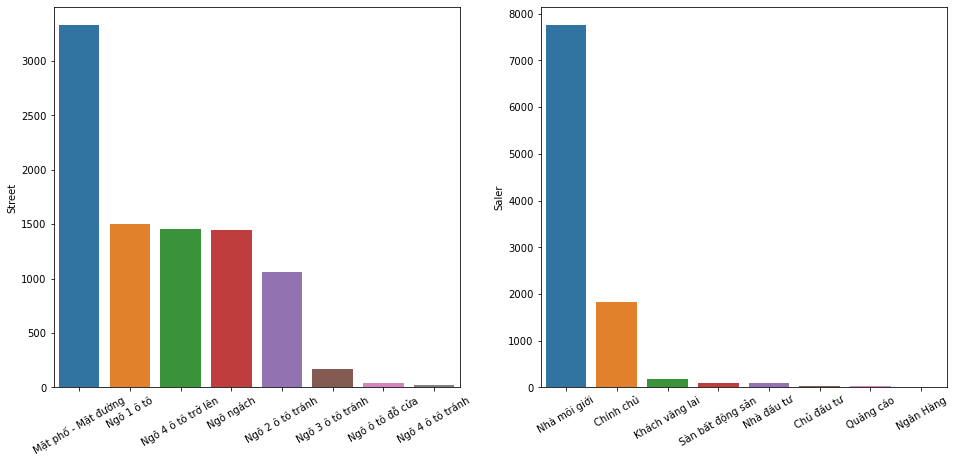

In [29]:
fig, ax = plt.subplots(1,2,figsize=(16,7))
sns.barplot(x=new_data['Street'].dropna().unique(),y =new_data['Street'].value_counts(), ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30)
sns.barplot(x=new_data['Saler'].dropna().unique(),y =new_data['Saler'].value_counts(), ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30)
plt.show()

In [30]:
new_data['Street'].value_counts()

Mặt phố - Mặt đường    3329
Ngõ ô tô đỗ cửa        1497
Ngõ 2 ô tô tránh       1455
Ngõ ngách              1445
Ngõ 1 ô tô             1062
Ngõ 3 ô tô tránh        174
Ngõ 4 ô tô trở lên       45
Ngõ 4 ô tô tránh         20
Name: Street, dtype: int64

In [31]:
# dict(new_data['Type'].value_counts())

In [32]:
new_data.Type.replace(['Chung cư, Chung cư mini', 'Chung cư, Chung cư mini', 'Biệt thự - Song lập - Đơn lập','Biệt thự du lịch','Nhà cấp 4'],\
                        ['Chung cư mini','Chung cư mini', 'Biệt thự','Biệt thự','Nhà ở' ],inplace=True)

In [33]:
list_type = list(new_data['Type'])
for i in range(len(list_type)):
    list_type[i] = list_type[i].split(',')[0]

In [34]:
new_data['Type'] = list_type

In [35]:
len(new_data['Type'].value_counts())

25

In [36]:
dict(new_data['Type'].value_counts())

{'Nhà ở': 5264,
 'Đất - Đất nền - Nhà như đất': 2786,
 'Chung cư': 857,
 'Biệt thự': 276,
 'Nhà liền kề - Song lập - Đơn lập': 191,
 'Chung cư mini': 155,
 'Shophouse - Nhà phố': 137,
 'Biệt thự - Song lập - Đơn lập': 83,
 'Nhà cấp 4': 71,
 'Khách sạn - Nhà nghỉ': 34,
 'Bất động sản khác': 33,
 'Phòng trọ/ Nhà trọ': 29,
 'Dự án BĐS - Khu nghỉ dưỡng - Resort': 23,
 'Mặt bằng thương mại': 21,
 'Toà nhà văn phòng': 18,
 'Căn hộ du lịch - Condotel': 14,
 'Kho bãi - Nhà xưởng': 10,
 'Tập thể': 9,
 'Căn hộ cho thuê': 9,
 'Nhà hàng - Cửa hàng - Ki ốt': 6,
 'Căn hộ dịch vụ - Homestay': 5,
 'Trang trại': 5,
 'Biệt thự du lịch': 3,
 'Sàn văn phòng': 2,
 'Karaoke': 1}

In [37]:
new_data[new_data['Type']=='Biệt thự - Song lập - Đơn lập']

,Price,Location,Area,Street,Facade,Direction,Saler,Type,Floor,Bathrooms,Bedrooms,Legal Doc,Price(million/m_square)
182,31.000,"Quận Tây Hồ, Thành phố Hà Nội",140.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,221.43
297,11.600,"Huyện Đông Anh, Thành phố Hà Nội",108.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,107.41
357,2.400,"Thành phố Bến Tre, Tỉnh Bến Tre",90.0,Mặt phố - Mặt đường,4.5,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,26.67
363,0.724,"Thành phố Bến Tre, Tỉnh Bến Tre",50.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,2.0,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,14.48
399,4.200,"Huyện Hoài Đức, Thành phố Hà Nội",100.0,Ngõ 2 ô tô tránh,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,42.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11090,6.800,"Quận Đống Đa, Thành phố Hà Nội",80.0,Ngõ ngách,4.0,Đông Bắc,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,3.0,4.0,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,85.00
11230,3.500,"Thành phố Sóc Trăng, Tỉnh Sóc Trăng",270.0,Mặt phố - Mặt đường,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,12.96
11253,28.000,"Quận Thanh Xuân, Thành phố Hà Nội",157.0,Ngõ 3 ô tô tránh,NaN,NaN,Nhà môi giới,Biệt thự - Song lập - Đơn lập,NaN,8.0,6.0,Giấy CN QSDĐ - Sổ đỏ - Sổ hồng,178.34
11293,3.500,"Thị xã Thái Hòa, Tỉnh Nghệ An",138.0,Ngõ 2 ô tô tránh,NaN,NaN,Chính chủ,Biệt thự - Song lập - Đơn lập,NaN,NaN,NaN,NaN,25.36


1 - Chung cư thường phân bổ ở những tỉnh thành nào? giải thích? <br>
2 - Các chung cư có nhiều phòng ngủ sẽ có giá cao hơn đúng không? <br>
3 - Diện tích các căn chung cư 1 phòng ngủ thường dưới 50 mét vuông đúng không? <br>
4 - Nhà ở TP Hồ Chí Minh được bán nhiều hơn bởi Nhà môi giới hay chính chủ hay thông qua sàn giao dịch?<br>
5 - Giá chung cư chưa có giấy tờ sẽ thấp hơn chung cư dã có giấy tờ?<br>
6 - Nhà được bán bởi chính chú thường có giá thấp hơn nhà bán bởi nhà môi giới?<br>
7 - Tại sao số bất động sản ở TP Hồ Chí Minh/Hà Nội lại nhiều hơn các tỉnh khác?<br>
8 - Đất nền hay chugn cư có giá cao hơn?<br>
9 - Những hơi nhiều đất nền thì ít chung cư và ngược lại đúng không ? Giải thích?<br>
10 - Diện tích nhà ở trung bình của TP HCM nhỏ hơn Hà Nội đúng không?<br>
11 - Phần lớn BĐS rao bán ở các TP?<br>
12 - Giá trung bình biệt thự là bao nhiêu?<br>
13 - Biệt thự thường tập trung ở các khu vực nào? Tại sao?<br>
14 - Nhà ở ở đường lớn có giá cao hơn nhà ở trong ngõ?<br>
15 - Nhà ở mặt phố thường có diện tích lớn hơn nhà ở trong ngõ?<br>
16 - Nhà có nhiều phòng ngủ sẽ có nhiều nhà vệ sinh?<br>
17 - Tại sao các tỉnh thành xung quanh TPHCM/HN thường bán nhà hoặc đất nền ? Giải thích?<br>
18 - Tỉ lệ thành phần các loại bất động sản ở HCM, HN, ĐN<br>
19 - Mỗi loại bất động sản ở quận 10, tphcm có giá trị tầm bn??<br>
20 - Giá trị trung bình chung cư 2 phòng ngủ giữa các quận ở HCM<br>
21 - Nơi nào ở hcm có nhu cầu giao dịch bất động sản nhiều nhất? lí giải<br>
22 - Mặt tiền ở thành phố bảo lộc (có thể dùng để mở cửa hàng) có giá trị bn?<br>
23 - Bạn có khoảng 5 tỷ ở SG, và bạn quyết tâm về quê chăn gà, và bạn quyết tâm về tây nguyên start up, nên mua đất nền ở đâu<br>

# Trả  lời một số câu hỏi bằng trực quan hóa

 ### Tỉ lệ thành phần các loại bất động sản ở HCM, HN, ĐN

In [38]:
hn_df = new_data.loc[(new_data['Location'].str.contains('Hà Nội'))]
replace_type = hn_df['Type'].value_counts().keys()[6:]

for val in replace_type:
    hn_df.loc[hn_df['Type'] == val, :] = 'Bất động sản khác'

In [39]:
dn_df = new_data.loc[(new_data['Location'].str.contains('Đà Nẵng'))]
replace_type = dn_df['Type'].value_counts().keys()[6:]

for val in replace_type:
    dn_df.loc[dn_df['Type'] == val, :] = 'Bất động sản khác'

In [40]:
hcm_df = new_data.loc[(new_data['Location'].str.contains('Hồ Chí Minh'))]
replace_type = hcm_df['Type'].value_counts().keys()[6:]

for val in replace_type:
    hcm_df.loc[hcm_df['Type'] == val, :] = 'Bất động sản khác'

In [41]:
# fig, axs = plt.subplots(1,3, figsize=(30,10))
# explode = (0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
# labels = pd.Series(hn_df['Type'].unique() + hcm_df['Type'].unique()+ dn_df['Type'].unique()).unique()

# hn_df['Type'].value_counts().plot.pie(labels=None, autopct='%1.2f%%', ax=axs[0], explode=explode, title='Hà Nội', ylabel='')
# dn_df['Type'].value_counts().plot.pie(labels=None, autopct='%1.2f%%', ax=axs[1], explode=explode, title='Đà Nẵng', ylabel='')
# hcm_df['Type'].value_counts().plot.pie(labels=None, autopct='%1.2f%%', ax=axs[2], explode=explode, title='Hồ Chí Minh', ylabel='')
# fig.legend(labels)
# fig.suptitle("Tỉ lệ bất động sản ở một số thành phố lớn")
# plt.show()

## Nhà có nhiều phòng ngủ sẽ có nhiều nhà tắm?

In [42]:
df = new_data.loc[(new_data['Type'].str.contains('Nhà ở')) | (new_data['Type'].str.contains('Chung cư')), ('Bathrooms', 'Bedrooms', 'Price(million/m_square)')]
df.fillna(df.mean(), inplace=True)
df

,Bathrooms,Bedrooms,Price(million/m_square)
0,3.519313,2.000000,52.78
3,3.519313,3.990705,14.00
6,3.519313,3.990705,37.25
9,3.519313,3.990705,11.79
10,4.000000,3.000000,86.67
...,...,...,...
11934,3.000000,2.000000,99.09
11935,3.519313,3.000000,47.67
11936,2.000000,2.000000,52.33
11937,3.519313,3.990705,33.33


In [43]:
def corr(x,y):
    slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
    print(scipy.stats.kendalltau(x, y))
    fig, ax=plt.subplots(figsize=(8, 6))
    ax.plot(x,y,linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x,label=line)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.legend(facecolor='white')
    plt.show()


KendalltauResult(correlation=0.34074805149731274, pvalue=1.8755518164659913e-226)


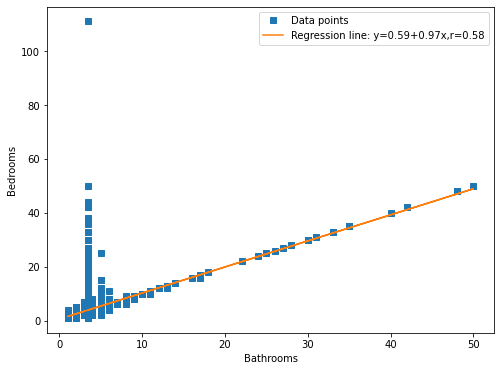

In [44]:
corr(df['Bathrooms'], df['Bedrooms'])

In [45]:
new_data.isna().sum()

Price                         0
Location                      0
Area                         33
Street                     1015
Facade                     4625
Direction                  8197
Saler                         0
Type                          0
Floor                      9577
Bathrooms                  8045
Bedrooms                   5462
Legal Doc                  1500
Price(million/m_square)      33
dtype: int64

# Phân tích hồi quy tuyến tính đơn 

*Từ phần này ta chỉ áp dụng với dữ liệu là nhà ở, chung cư, chung cư mini, nhà cấp 4*

In [46]:
# location_list = new_data['Location']
# districts = []
# cities = []
# for place in location_list:
#     seperate = place.split(',')
#     districts.append(seperate[0])
#     cities.append(seperate[1])
# new_data['District'] = districts
# new_data['City'] = cities
# new_data.drop(['Location'], axis=1, inplace=True)

In [48]:
types = ['Nhà ở', 'Chung cư', 'Chung cư mini', 'Nhà cấp 4']
house = new_data.loc[(new_data['Type']).isin(types)]
house.drop(['Price(million/m_square)', 'Saler'], axis=1, inplace=True)
house.head(2)

,Price,Location,Area,Street,Facade,Direction,Type,Floor,Bathrooms,Bedrooms,Legal Doc
0,4.75,"Quận Sơn Trà, Thành phố Đà Nẵng",90.0,Mặt phố - Mặt đường,5.0,Đông Bắc,Nhà ở,NaN,NaN,2.0,NaN
3,0.77,"Quận Thanh Xuân, Thành phố Hà Nội",55.0,Ngõ 1 ô tô,NaN,NaN,Chung cư mini,NaN,NaN,NaN,"Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán"


In [49]:
# types = ['Nhà ở', 'Chung cư', 'Chung cư mini', 'Nhà cấp 4']
# house = new_data.loc[(new_data['Type']).isin(types)]
# house.drop(['Price(million/m_square)'], axis=1, inplace=True)
# house.head(2)

In [50]:
numeric_cols_df = house.select_dtypes(exclude='object')

def median(col):
    return col.quantile(0.5)

def lower_quantile(col):
    return col.quantile(0.25)

def upper_quantile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, median, lower_quantile, upper_quantile,max])

,Price,Area,Facade,Floor,Bathrooms,Bedrooms
missing_ratio,0.000000e+00,0.425398,45.848432,93.682055,70.600284,33.622184
min,1.100000e-03,7.000000,1.000000,1.000000,1.000000,1.000000
median,4.150000e+00,54.000000,4.500000,4.000000,3.000000,3.000000
lower_quantile,2.700000e+00,40.000000,4.000000,3.000000,2.000000,2.000000
upper_quantile,6.600000e+00,76.625000,5.300000,5.000000,4.000000,4.000000
max,3.750000e+09,70783.000000,313.600000,50.000000,50.000000,111.000000


In [52]:
house.drop(['Floor', 'Bathrooms'], axis=1, inplace=True)

In [53]:
house[house['Price'] > 1000]

,Price,Location,Area,Street,Facade,Direction,Type,Bedrooms,Legal Doc
5294,3.750000e+09,"Quận Nam Từ Liêm, Thành phố Hà Nội",40.0,Ngõ 2 ô tô tránh,NaN,NaN,Nhà ở,6.0,"Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán"
7358,1.800000e+03,"Thành phố Thủ Dầu Một, Tỉnh Bình Dương",49.0,NaN,NaN,NaN,Chung cư,NaN,NaN
7449,1.820000e+03,"Huyện Thới Lai, Thành phố Cần Thơ",84.0,NaN,NaN,NaN,Nhà ở,NaN,NaN
7581,2.260000e+06,"Thành phố Vũng Tàu, Tỉnh Bà Rịa - Vũng Tàu",76.0,NaN,NaN,NaN,Chung cư,NaN,NaN


In [54]:
house.drop([5294,7581,7358,7449], inplace=True)

In [55]:
cat_col_df = house.select_dtypes(include='object')

def missing_ratio(col):
    return col.isna().mean()*100

def top10_value_counts(col):
    return dict(col.value_counts()[:10])

category_stat = cat_col_df.agg([missing_ratio, pd.Series.nunique, top10_value_counts])
pd.set_option('display.max_colwidth', 1000)
category_stat

,Location,Street,Direction,Type,Legal Doc
missing_ratio,0,9.99527,83.4306,0,12.6596
nunique,163,8,30,4,12
top10_value_counts,"{'Quận Hà Đông, Thành phố Hà Nội': 543, 'Quận Đống Đa, Thành phố Hà Nội': 526, 'Quận Thanh Xuân, Thành phố Hà Nội': 482, 'Quận Cầu Giấy, Thành phố Hà Nội': 399, 'Quận Hoàng Mai, Thành phố Hà Nội': 336, 'Quận Bắc Từ Liêm, Thành phố Hà Nội': 286, 'Quận Hai Bà Trưng, Thành phố Hà Nội': 282, 'Quận Gò Vấp, Thành phố Hồ Chí Minh': 245, 'Quận Long Biên, Thành phố Hà Nội': 227, 'Quận Nam Từ Liêm, Thành phố Hà Nội': 227}","{'Ngõ ngách': 1321, 'Mặt phố - Mặt đường': 1306, 'Ngõ ô tô đỗ cửa': 1234, 'Ngõ 2 ô tô tránh': 899, 'Ngõ 1 ô tô': 816, 'Ngõ 3 ô tô tránh': 113, 'Ngõ 4 ô tô trở lên': 14, 'Ngõ 4 ô tô tránh': 6}","{'Đông Nam': 229, 'Tây Bắc': 148, 'Đông Bắc': 139, 'Tây Nam': 124, 'Nam': 92, 'Đông Tứ Trạch': 67, 'Bắc': 62, 'Đông': 59, 'Tây Tứ Trạch': 52, 'Tây': 37}","{'Nhà ở': 5262, 'Chung cư': 855, 'Chung cư mini': 155, 'Nhà cấp 4': 71}","{'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng': 5171, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán': 230, 'Hợp đồng mua bán': 121, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Giấy tờ chứng minh nguồn gốc': 4, 'Đã có giấy hẹn lấy số': 3, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Hợp đồng mua bán, Hợp đồng góp vốn': 3, 'Giấy CN QSDĐ - Sổ đỏ - Sổ hồng, Giấy tờ chứng minh nguồn gốc': 2, 'Đang làm giấy CN QSDĐ': 2, 'Đất giao - Đất phân, Giấy tờ chứng minh nguồn gốc': 1, 'Hợp đồng mua bán, Hợp đồng góp vốn': 1}"


In [56]:
house.drop(['Direction'], axis=1, inplace=True)

In [57]:
# num_col = ['Area', 'Facade', 'Bedrooms', 'Price(million/m_square)']
# cate_col = ['Location', 'Street', 'Direction', 'Type', 'Legal Doc']

In [58]:
num_col = ['Area', 'Facade', 'Bedrooms', 'Price']
cate_col = ['Location', 'Street', 'Type', 'Legal Doc']

In [59]:
class MyLEncoder():
    def __init__(self, key=[]):
        self.key = []
        self.size= (0,0)
    def transform(self, X, y=None, **fit_params):
        new_X = X.copy().reshape(-1)
        enc = LabelEncoder()
        self.fit(X, y, **fit_params)
        enc = enc.fit(new_X)
        self.classes=enc.classes_
        
        return enc.transform(new_X).reshape(self.size)

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        # self.key = list(X.columns)
        self.size=X.shape        
        return self


In [60]:
# num_imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
cate_imputer=Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), ('encoder', MyLEncoder())])
rem_num_col = list(set(num_col) - set(['Floor', 'Bathrooms', 'Bedrooms']))

In [61]:
# transfer = ColumnTransformer([('num', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0), ['Floor', 'Bathrooms',	'Bedrooms']),
#                               ('other', SimpleImputer(missing_values=np.nan, strategy='mean'), rem_num_col),
#                               ('cate', cate_imputer, cate_col)], remainder='drop')
# transfer

In [62]:
transfer = ColumnTransformer([
                              ('other', SimpleImputer(missing_values=np.nan, strategy='mean'), num_col),
                              ('cate', cate_imputer, cate_col)], remainder='drop')
transfer

ColumnTransformer(transformers=[('other', SimpleImputer(),
                                 ['Area', 'Facade', 'Bedrooms', 'Price']),
                                ('cate',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  <__main__.MyLEncoder object at 0x000001C0C593FEE0>)]),
                                 ['Location', 'Street', 'Type', 'Legal Doc'])])

In [63]:
# p = Pipeline(steps=[('transfer', transfer), ('scale', StandardScaler())])
p = Pipeline(steps=[('transfer', transfer)])
p

Pipeline(steps=[('transfer',
                 ColumnTransformer(transformers=[('other', SimpleImputer(),
                                                  ['Area', 'Facade', 'Bedrooms',
                                                   'Price']),
                                                 ('cate',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   <__main__.MyLEncoder object at 0x000001C0C593FEE0>)]),
                                                  ['Location', 'Street', 'Type',
                                                   'Legal Doc'])]))])

In [64]:
a = p.fit_transform(house).round(4)
scale_df = pd.DataFrame(a, columns = ['Bedroom'] + rem_num_col+ cate_col)
scale_df

,Bedroom,Facade,Area,Price,Location,Street,Type,Legal Doc
0,90.0,5.0000,2.000,4.75,125.0,77.0,86.0,2.0
1,55.0,5.2923,4.004,0.77,127.0,78.0,1.0,5.0
2,51.0,5.2923,4.004,1.90,180.0,77.0,0.0,2.0
3,56.0,5.2923,4.004,0.66,132.0,78.0,1.0,5.0
4,30.0,5.2923,3.000,2.60,120.0,83.0,86.0,2.0
...,...,...,...,...,...,...,...,...
6338,55.0,3.5000,2.000,5.45,108.0,78.0,86.0,2.0
6339,90.0,4.5000,3.000,4.29,123.0,77.0,86.0,2.0
6340,43.0,6.0000,2.000,2.25,123.0,78.0,86.0,2.0
6341,33.0,5.2923,4.004,1.10,112.0,79.0,86.0,2.0


In [65]:
y = scale_df['Price']
# yy = scale_df['Price']
scale_df.drop(['Price'], axis=1, inplace=True)

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [67]:
X = sm.add_constant(scale_df)
X.shape

(6343, 8)

In [68]:
result = sm.OLS(y, X).fit()

In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     98.55
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          3.34e-137
Time:                        16:42:34   Log-Likelihood:                -24585.
No. Observations:                6343   AIC:                         4.919e+04
Df Residuals:                    6335   BIC:                         4.924e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.6768      4.321     13.348      0.000      49.206      66.147
Bedroom        0.0001      0.000      0.867      0.386      -0.000       0.000
Facade         0.1781      0.033      5.438      0.000       0.114       0.242
Area           0.7815      0.045     17.249      0.000       0.693       0.870
Location       0.0031      0.005      0.565      0.572      -0.008       0.014
Street        -0.7404      0.053    -13.990      0.000      -0.844      -0.637
Type           0.0587      0.005     11.934      0.000       0.049       0.068
Legal Doc     -0.0037      0.013     -0.280      0.780      -0.030       0.022
==============================================================================
Omnibus:                    13240.151   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77506320.294
Skew:                          17.602   Prob(JB):                         0.00
Kurtosis:                     543.390   Cond. No.                     2.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\rightarrow$ Dựa vào bảng trên, ta không thấy có biến nào có mỗi tương quan với biến phụ thuộc là **Price(million/m_square)**

# Dự đoán giá nhà ở, chung cư bằng mô hình Linear Regression

In [70]:
X_train, X_test, y_train, y_test = train_test_split(scale_df, y, test_size=0.33, random_state=2200)

In [71]:
X_train.shape

(4249, 7)

In [72]:
X_test.shape

(2094, 7)

In [73]:
y_train.shape

(4249,)

In [74]:
y_test.shape

(2094,)

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
model.score(X_test, y_test)

0.05850627313941992

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [125]:
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.00027129008308290903

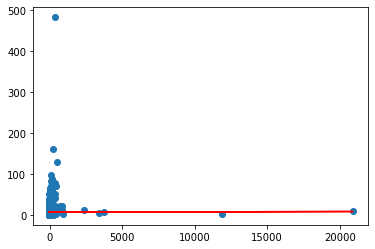

In [126]:
plt.scatter(X_test_pca, y_test)
plt.plot(X_test_pca, model.predict(X_test_pca), color='red')
plt.show()

In [90]:
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor()
# yhat = lof.fit_predict(X_train)
# mask = yhat != -1
# X_train_new, y_train_new = X_train.iloc[mask, :], y_train[mask]

In [122]:
# model.fit(X_train_new, y_train_new)
# model.score(X_test, y_test)